# Ejercicio XOR (Redes Neuronales)

In [3]:
from pybrain.tools.shortcuts import buildNetwork
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer
import matplotlib.pyplot as plt
%matplotlib inline

Leer datos generados XOR

In [17]:
import pandas as pd
import numpy as np
import csv
dia = csv.excel()
df = pd.read_csv("xor.csv")
df_grid = pd.read_csv("XOR_grid.csv")
X_train = df[['X1','X2']]
Y_train = df[['Y']]

Construir red neuronal

In [5]:
net = buildNetwork(2,4,1)

Agregar a estructura de Pybrain

In [6]:
ds = SupervisedDataSet(2,1)
ds.setField('input',X_train)
ds.setField('target',Y_train)

Entrenar red

In [7]:
trainer = BackpropTrainer(net,ds)
for i in range(5):
    trainer.train()

Probar la red entrenada para diversos tipos de entradas

In [8]:
def redondeo(x):
    if x>=.5:
        return 1
    else:
        return 0

In [9]:
redondeo(net.activate([0,1]))

1

In [10]:
redondeo(net.activate([1,0]))

1

In [11]:
redondeo(net.activate([1,1]))

0

In [12]:
redondeo(net.activate([0,0]))

0

Checar parametros y graficar la regla de decision

In [13]:
net.params

array([-0.31914623,  0.38653107,  0.5178996 ,  1.99986173, -1.58333359,
        0.55093333,  1.50440635, -3.32593899, -3.2713858 , -1.5352536 ,
       -1.4159599 , -1.03750646, -1.4426882 , -0.61362807, -3.3003044 ,
        3.23325915, -0.5578322 ])

In [64]:
y = range(len(df_grid))
k=0
while k<120:
    for i in range(11):
        for j in range(11):
            y[k] = redondeo(net.activate([df_grid['X1'][i],df_grid['X2'][j+(i*10)]]))
            k =k+1

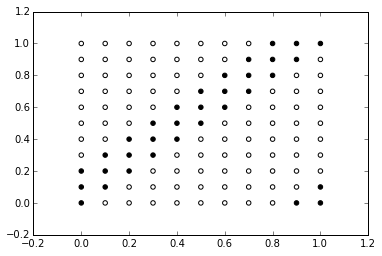

In [70]:
plt.scatter(df_grid['X1'],df_grid['X2'],c=y)
plt.gray()
plt.show()